In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
n = 200
sigma = 3
mean = 0
low = 0
high = 20

x = np.random.uniform(low = low, high = high, size = n).reshape(-1,1)
x = np.hstack([np.ones_like(x),x])

#gaussian noise
noise = np.random.normal(mean, sigma, x.shape[0])

In [4]:
#below is dataset generating 
params = np.array([3,2])
y = x.dot(params) + noise

Text(0.5, 0, 'x')

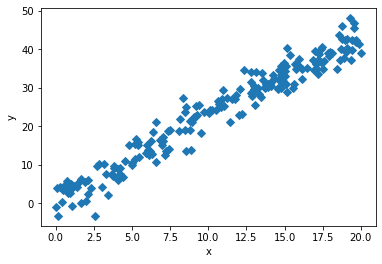

In [5]:
plt.plot(x[:,1],y,'D')
plt.ylabel('y')
plt.xlabel('x')

In [6]:
#shuffling the data

data = np.hstack([x,y.reshape(len(y),1)])
np.random.shuffle(data)

split_ind = int(np.floor((n*8)/10))
train = data[:split_ind]
test  = data[split_ind:]

(x_train,y_train) = (train[:,:x.shape[1]],train[:,-1])
(x_test,y_test) = (test[:,:x.shape[1]],test[:,-1])

In [7]:
def h(x, theta):
    return x.dot(theta)

In [15]:
def mean_squared_error(predicted_value,true_value):
    return (1/len(predicted_value))*np.sum((predicted_value - true_value)**2)

In [16]:
def gradient_descent(rate, data, label, iterations = 1000):
    theta = np.zeros(data.shape[1],)
    m = data.shape[0]

    for _ in range(iterations):
        current_prediction = h(data,theta)
        theta -= (rate/m)*(data.T.dot((current_prediction - label)))
    return theta

In [17]:
alpha = 0.01
iterations = 2000
theta = gradient_descent(alpha, x_train, y_train, iterations)
print(theta)

[0.858538   2.16210143]


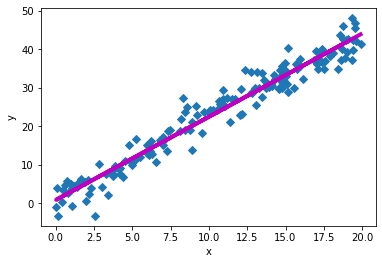

In [18]:
#regression line training

plt.plot(x_train[:,x.shape[1]-1],y_train,'D')
plt.ylabel('y')
plt.xlabel('x')
plt.plot(x_train[:,x.shape[1]-1],  np.dot(x_train,theta),'m',linewidth=4)

## Accuracy

In [19]:
pred = h(x_train,theta)
print(mean_squared_error(pred,y_train))

7.8701484429787785


## Testing on x_test, y_test

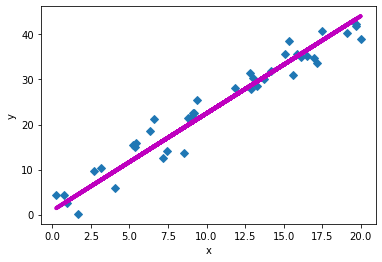

In [20]:
plt.plot(x_test[:,x.shape[1]-1],y_test,'D')
plt.ylabel('y')
plt.xlabel('x')
plt.plot(x_test[:,x.shape[1]-1],  np.dot(x_test,theta),'m',linewidth=4)

In [21]:
pred_test = h(x_test,theta)
print(mean_squared_error(pred_test,y_test))

8.758652753086475
